In [4]:
from IPython.display import Image


## Therapeutics Data Commons

In [1]:
!pip install PyTDC
!pip install DeepPurpose


Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached PyTDC-0.3.9.tar.gz (106 kB)
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 58.6 MB/s eta 0:00:0000:0100:01
  Using cached fuzzywuzzy-0.18.0-py2.py3-none-any.whl (18 kB)
  Created wheel for PyTDC: filename=PyTDC-0.3.9-py3-none-any.whl size=139185 sha256=d4f479217036acef1d8dbe0ed8837bb01a30e0c989a2dfa5a71a03907fa07936
  Stored in directory: /home/ec2-user/.cache/pip/wheels/72/be/63/8bd19dcd3da37056586eae59ec995004136e47e225265588c7
Successfully built PyTDC
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Using cached DeepPurpose-0.1.5.tar.gz (158 kB)
  Preparing metadata (setup.py) ... done
  Using cached wget-3.2.zip (10 kB)
  Preparing metadata (setup.py) ... done
  Using cached pandas_flavor-0.5.0-py3-none-any.whl (7.1 kB)
  Using cached subword_nmt-0.3.8-py3-none-any.whl (27 kB)
  Using cached life

In [3]:
!pip install git+https://github.com/bp-kelley/descriptastorus
!pip install pandas-flavor

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
  Cloning https://github.com/bp-kelley/descriptastorus to /tmp/pip-req-build-nacdronw
  Running command git clone --filter=blob:none --quiet https://github.com/bp-kelley/descriptastorus /tmp/pip-req-build-nacdronw
  Resolved https://github.com/bp-kelley/descriptastorus to commit 86eedc60546abe6f59cdbcb12025a61157ba178d
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 55.0 MB/s eta 0:00:0000:0100:01
  Created wheel for descriptastorus: filename=descriptastorus-2.5.0.20-py3-none-any.whl size=1083427 sha256=0ca3aebb2622a65bebb16e5610d942a3d668b452db85ad0cb9a2e05f6731061d
  Stored in directory: /tmp/pip-ephem-wheel-cache-081vqw4y/wheels/75/22/0c/8c173f48f600c993360282e42be36d90f16610dc50b5eea611
Successfully built descriptastorus
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


t contains solvable ML tasks, ML-ready datasets, and curated benchmarks and leadearboards, all accessible via a Python package. Datasets in the Commons cover a wide range of therapeutic products (e.g., small molecules, biologics, gene editing therapies) across the entire discovery and development pipeline (e.g., target identification, hit discovery, lead optimization, manufacturing).

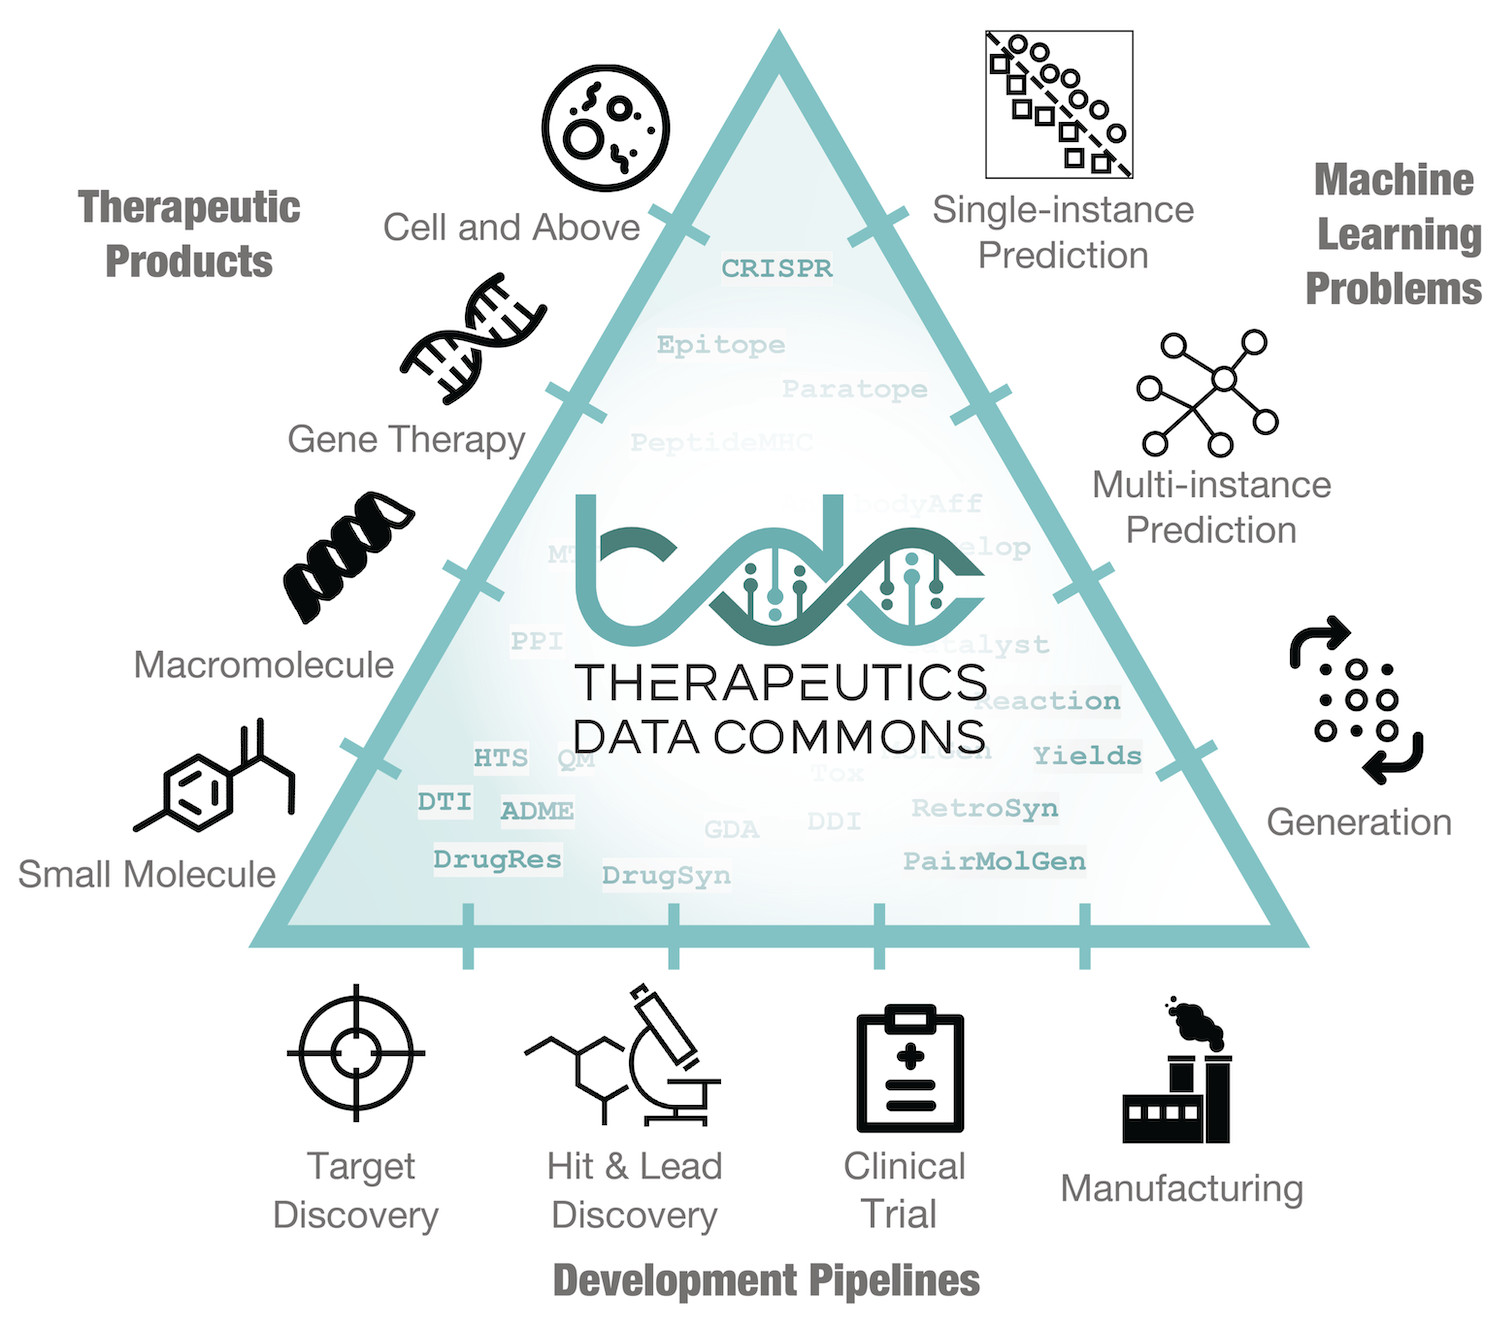

In [6]:
Image('assets/tdc_triangle.png', width=600, height=600)

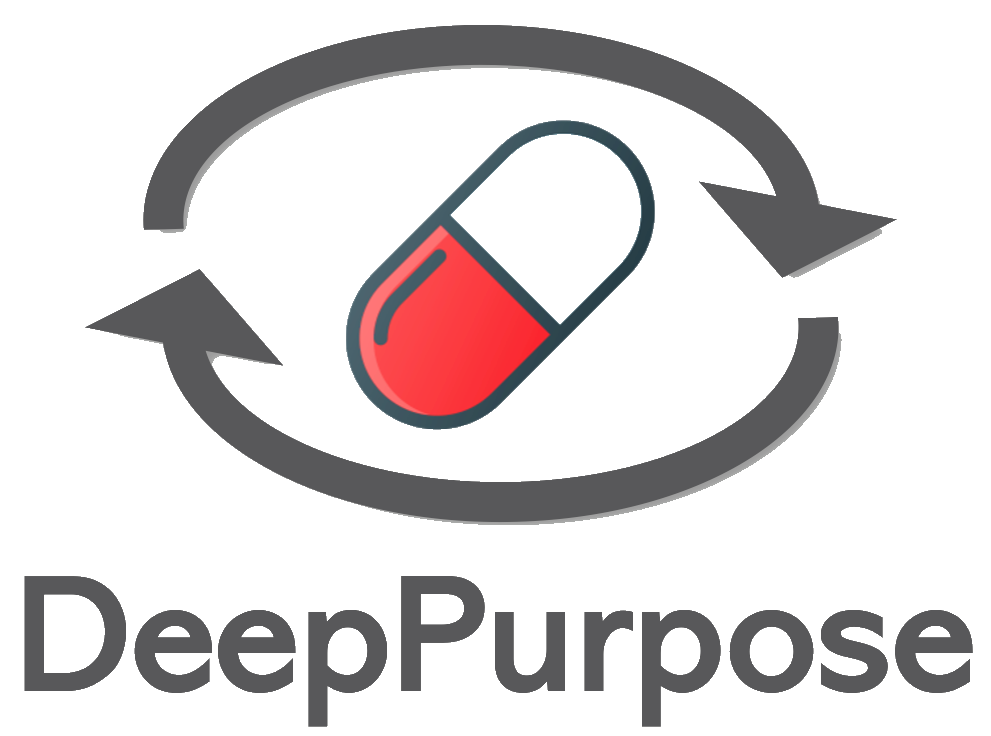

In [7]:
Image('assets/logo_dp_2.png', width=600, height=600)

### Single Instance Predicton

#### Caco-2 (Cell Effective Permeability), Wang et al.


Dataset Description: The human colon epithelial cancer cell line, Caco-2, is used as an in vitro model to simulate the human intestinal tissue. The experimental result on the rate of drug passing through the Caco-2 cells can approximate the rate at which the drug permeates through the human intestinal tissue.

Task Description: Regression. Given a drug SMILES string, predict the Caco-2 cell effective permeability.

Dataset Statistics: 906 drugs.

In [11]:
import tdc
from tdc.single_pred import ADME
data = ADME(name = 'Caco2_Wang')
df = data.get_data()
splits = data.get_split()

Downloading...
100%|██████████| 82.5k/82.5k [00:00<00:00, 921kiB/s]
Loading...
Done!


In [12]:
df

,Drug_ID,Drug,Y
0,(-)-epicatechin,Oc1cc(O)c2c(c1)OC(c1ccc(O)c(O)c1)C(O)C2,-6.220000
1,"(2E,4Z,8Z)-N-isobutyldodeca-2,4,10-triene-8 -y...",C/C=C\C#CCC/C=C\C=C\C(=O)NCC(C)C,-3.860000
2,codeine,COc1ccc2c3c1O[C@H]1[C@@H](O)C=C[C@H]4[C@@H](C2...,-4.090000
3,creatinine,CN1CC(=O)NC1=N,-5.935409
4,danazol,C#C[C@]1(O)CC[C@H]2[C@@H]3CCC4=Cc5oncc5C[C@]4(...,-4.840000
...,...,...,...
905,Capric acid (decanoic acid),CCCCCCCCCC(=O)O,-4.680000
906,Apometzgerin (2),COc1cc(-c2cc(=O)c3c(O)cc(O)cc3o2)cc(O)c1OC,-4.950000
907,3,COC(=O)C[C@@H](C(=O)NN(Cc1ccc(/C=C\c2ccccc2)cc...,-5.080000
908,51d,COc1ccc2c(O[C@@H]3C[C@H]4C(=O)N[C@]5(C(=O)NS(=...,-5.300000


### Multi-instance Prediction Problem

Drug-Drug Interaction Prediction Task Overview

Definition: Drug-drug interactions occur when two or more drugs interact with each other. These could result in a range of outcomes from reducing the efficacy of one or both drugs to dangerous side effects such as increased blood pressure or drowsiness. Polypharmacy side-effects are associated with drug pairs (or higher-order drug combinations) and cannot be attributed to either individual drug in the pair. This task is to predict the interaction between two drugs.

Impact: Increasing co-morbidities with age often results in the prescription of multiple drugs simultaneously. Meta analyses of patient records showed that drug-drug interactions were the cause of admission for prolonged hospital stays in 7% of the cases. Predicting possible drug-drug interactions before they are prescribed is thus an important step in preventing these adverse outcomes. In addition, as the number of combinations or even higher-order drugs is astronomical, wet-lab experiments or real-world evidence are insufficient. Machine learning can provide an alternative way to inform drug interactions.

Generalization: As there is a very large space of possible drug-drug interactions that have not been explored, the model needs to extrapolate from known interactions to new drug combinations that have not been prescribed together in the past. Models should also taken into account dosage as that can have a significant impact on the effect of the drugs.

Product: Small-molecule.

Pipeline: Efficacy and safety - adverse event detection.

In [13]:
from tdc.multi_pred import DDI
data = DDI(name = 'DrugBank')
split = data.get_split()

Downloading...
100%|██████████| 44.4M/44.4M [00:02<00:00, 20.7MiB/s]
Loading...
Done!


In [14]:
split

{'train':        Drug1_ID                                              Drug1 Drug2_ID  \
 0       DB04571                CC1=CC2=CC3=C(OC(=O)C=C3C)C(C)=C2O1  DB00460   
 1       DB09536                                           O=[Ti]=O  DB00460   
 2       DB01600              CC(C(O)=O)C1=CC=C(S1)C(=O)C1=CC=CC=C1  DB00460   
 3       DB09000         CC(CN(C)C)CN1C2=CC=CC=C2SC2=C1C=C(C=C2)C#N  DB00460   
 4       DB11630  OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)...  DB00460   
 ...         ...                                                ...      ...   
 134260  DB00437                                 OC1=NC=NC2=C1C=NN2  DB00524   
 134261  DB00437                                 OC1=NC=NC2=C1C=NN2  DB01197   
 134262  DB00437                                 OC1=NC=NC2=C1C=NN2  DB00542   
 134263  DB00437                                 OC1=NC=NC2=C1C=NN2  DB00492   
 134264  DB00415  [H][C@]12SC(C)(C)[C@@H](N1C(=O)[C@H]2NC(=O)[C@...  DB00437   
 
                             

In [15]:
from tdc.utils import get_label_map
get_label_map(name = 'DrugBank', task = 'DDI')

{1: '#Drug1 may increase the photosensitizing activities of #Drug2.',
 2: '#Drug1 may increase the anticholinergic activities of #Drug2.',
 3: 'The bioavailability of #Drug2 can be decreased when combined with #Drug1.',
 4: 'The metabolism of #Drug2 can be increased when combined with #Drug1.',
 5: '#Drug1 may decrease the vasoconstricting activities of #Drug2.',
 6: '#Drug1 may increase the anticoagulant activities of #Drug2.',
 7: '#Drug1 may increase the ototoxic activities of #Drug2.',
 8: 'The therapeutic efficacy of #Drug2 can be increased when used in combination with #Drug1.',
 9: '#Drug1 may increase the hypoglycemic activities of #Drug2.',
 10: '#Drug1 may increase the antihypertensive activities of #Drug2.',
 11: 'The serum concentration of the active metabolites of #Drug2 can be reduced when #Drug2 is used in combination with #Drug1 resulting in a loss in efficacy.',
 12: '#Drug1 may decrease the anticoagulant activities of #Drug2.',
 13: 'The absorption of #Drug2 can be de

### Generation Problem

#### Molecule Generation Task Overview


Definition: Molecule Generation is to generate diverse, novel molecules that has desirable chemical properties. These properties are measured by oracle functions. A machine learning task first learns the molecular characteristics from a large set of molecules where each is evaluated through the oracles. Then, from the learned distribution, we can obtain novel candidates.

Impact: As the entire chemical space is far too large to screen for each target, high through screening can only be restricted to a set of existing molecule library. Many novel drug candidates are thus usually omitted. A machine learning that can generate novel molecule obeying some pre-defined optimal properties can circumvent this problem and obtain novel class of candidates.

Generalization: The generated molecules have to obtain superior properties given a range of structurally diverse drugs. Besides, the generated molecules have to suffice other basic properties, such as synthesizablility and low off-target effects.

Product: Small-molecule.

Pipeline: Efficacy and safety - lead development and optimization, activity - hit identification.

In [4]:
from DeepPurpose import utils, CompoundPred
from tdc.single_pred import ADME

In [5]:
X, y = ADME(name = 'HIA_Hou').get_data(format = 'DeepPurpose')


Found local copy...
Loading...
Done!


In [6]:
# https://tdcommons.ai/single_pred_tasks/adme/
# https://github.com/kexinhuang12345/DeepPurpose
X, y = ADME(name = 'HIA_Hou').get_data(format = 'DeepPurpose')
drug_encoding = 'MPNN'
# MPNN, CNN, MLP, CNN+RNN and Transfomer

Found local copy...
Loading...
Done!


In [7]:
train, val, test = utils.data_process(X_drug = X, 
                                      y = y, 
                                      drug_encoding = drug_encoding,
                                      random_seed = 'TDC')

Drug Property Prediction Mode...
in total: 578 drugs
encoding drug...
unique drugs: 578
Done.


1. feature[0] (torch.Tensor) - atom-level feature
2. feature[1] (torch.Tensor) - bond-level feature
3. feature[2] (torch.Tensor) - neighbor information of every atom
4. feature[3] (torch.Tensor) - neighbor information of every bond
5. feature[4] (torch.Tensor) - store number of atoms and bonds for each molecule in a batch

In [8]:
train.drug_encoding[0][4]

tensor([[10., 21.]])

In [9]:
config = utils.generate_config(drug_encoding = drug_encoding, 
                         train_epoch = 3, 
                         LR = 0.001, 
                         batch_size = 128,
                         mpnn_hidden_size = 32,
                         mpnn_depth = 2
                        )

In [10]:
model = CompoundPred.model_initialize(**config)

Let's use CPU/s!
--- Data Preparation ---
--- Go for Training ---
Training at Epoch 1 iteration 0 with loss 0.68279. Total time 0.0 hours
Validation at Epoch 1 , AUROC: 0.56862 , AUPRC: 0.88669 , F1: 0.93577
Training at Epoch 2 iteration 0 with loss 0.36297. Total time 0.0 hours
Validation at Epoch 2 , AUROC: 0.57703 , AUPRC: 0.91602 , F1: 0.93577
Training at Epoch 3 iteration 0 with loss 0.46316. Total time 0.00027 hours
Validation at Epoch 3 , AUROC: 0.57142 , AUPRC: 0.91321 , F1: 0.93577
--- Go for Testing ---
Testing AUROC: 0.49834983498349833 , AUPRC: 0.8729811519617816 , F1: 0.9308755760368664
--- Training Finished ---


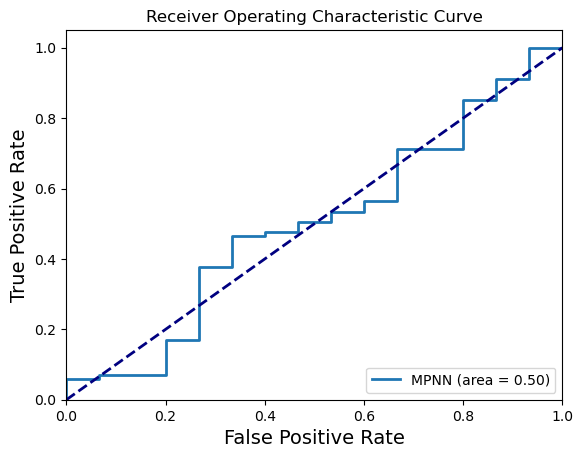

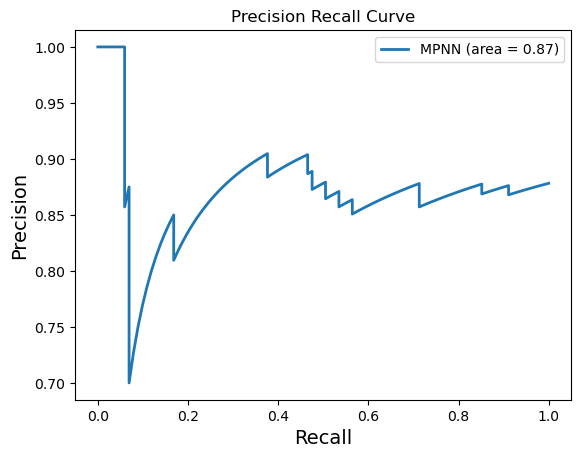

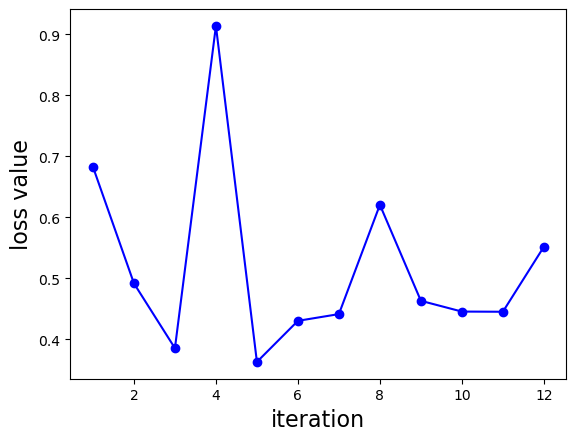

In [11]:
model.train(train, val, test)
